<a href="https://colab.research.google.com/github/epic-coder97/Data-602/blob/main/Week_9_Homework_DATA_602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data 602 - Week 9 Homework

---
- Nikita Dharmadhikari
- AE03255



Natural Language Processing
Use the train.tsv file at
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data
- Load the data, show the first five rows, check the data, and provide information on
the data.
- Show the distribution of review documents.
- Generate the document term matrix by using scikitlearn’s CountVectorizer. From
nltk.tokenizer import RegexpTokenizer. ‘Sentiment’ is the data. Train, test and split.
- Import the MultinomialNB module and create a MNB classifier object using the
MultinomialNB() function. Import scikit.learn metrics to compute the accuracy and fit
the model before computing the accuracy. What is the outcome?
- Use TfidfVectorizer-transformed data and split it into training and test datasets.
- Build the text classification model using TF-IDF. First, import the MultinomialNB
module and create the MNB classifier object using the MultinomialNB function. Fit the
model on the training set and perform the prediction. Is the accuracy better?

In [107]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib as plt
# Import dataset
dataset = pd.read_csv('/content/train.tsv', sep = '\t')

In [108]:
dataset.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [109]:
dataset.shape

(156060, 4)

In [117]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


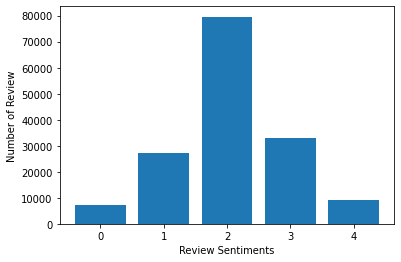

In [118]:
import matplotlib.pyplot as plt
Sentiment_count=dataset.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [119]:
dataset.Sentiment.value_counts()


2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

This data has 5 sentiment labels:

0 - negative 1 - somewhat negative 2 - neutral 3 - somewhat positive 4 - positive

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(dataset['Phrase'])

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, dataset['Sentiment'], test_size=0.3, random_state=42)

In [122]:
y_train.fillna(value=y_train.mean(),inplace=True)

In [54]:
y_train = y_train.fillna(lambda x: x.median())


In [44]:
type(y_train)

pandas.core.series.Series

In [123]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6064975009611688


### Model Building and Evaluation (TF-IDF)
Let's build the Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create the Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(dataset['Phrase'])

## Split train and test set (TF-IDF)
Let's split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, dataset['Sentiment'], test_size=0.3, random_state=123)

In [126]:
y_test.isnull().sum()

0

In [127]:
y_train.fillna(value=y_train.mean(),inplace=True)

In [129]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


Well, you got a classification rate of 58.65% using TF-IDF features, which is not considered as good accuracy. We need to improve the accuracy by using some other preprocessing or feature engineering. Let's suggest in comment box some approach for accuracy improvement.